In [45]:
import numpy as np

In [46]:
import pandas as pd

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('Housing.csv')

In [49]:
housing = df
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [50]:
m = len(housing)
m

545

In [51]:
housing.shape

(545, 13)

In [52]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)

In [53]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [54]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [55]:
df_test.shape

(109, 13)

In [56]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'price']
df_newtrain = df_train[num_vars]
df_newtest = df_test[num_vars]
df_newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,price
542,3620,2,1,1,1,0,0,0,0,0,1750000
496,4000,2,1,1,1,0,0,0,0,0,2695000
484,3040,2,1,1,0,0,0,0,0,0,2870000
507,3600,2,1,1,1,0,0,0,0,0,2590000
252,9860,3,1,1,1,0,0,0,0,0,4515000


In [57]:
df_newtest.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,price
239,4000,3,1,2,1,0,0,0,0,1,4585000
113,9620,3,1,1,1,0,1,0,0,2,6083000
325,3460,4,1,2,1,0,0,0,1,0,4007500
66,13200,2,1,1,1,0,1,1,0,1,6930000
479,3660,4,1,2,0,0,0,0,0,0,2940000


In [58]:
df_newtrain.shape

(436, 11)

In [59]:
y_test = df_newtest.pop('price')
x_test = df_newtest.copy()

y_train = df_newtrain.pop('price')
x_train = df_newtrain.copy()

In [60]:
x1 = x_train.values[:, 0]
x2 = x_train.values[:, 1]
x3 = x_train.values[:, 2]
x4 = x_train.values[:, 3]
x5 = x_train.values[:, 4]
x6 = x_train.values[:, 5]
x7 = x_train.values[:, 6]
x8 = x_train.values[:, 7]
x9 = x_train.values[:, 8]
x10 = x_train.values[:, 9]
y = y_train.values
m = len(y)
print('x =', x1[: 10])
print('y =', y[: 10])
print('m =', m)
len(x1)

x = [3620 4000 3040 3600 9860 3968 3840 9800 3640 3520]
y = [1750000 2695000 2870000 2590000 4515000 4410000 4585000 5250000 3570000
 3640000]
m = 436


436

In [61]:
x_1 = x_test.values[:, 0]
x_2 = x_test.values[:, 1]
x_3 = x_test.values[:, 2]
x_4 = x_test.values[:, 3]
x_5 = x_test.values[:, 4]
x_6 = x_test.values[:, 5]
x_7 = x_test.values[:, 6]
x_8 = x_test.values[:, 7]
x_9 = x_test.values[:, 8]
x_10 = x_test.values[:, 9]
y_test = y_test.values
n = len(y_test)
print('x =', x_1[: 10])
print('y =', y_test[: 10])
print('n =', n)
len(x_1)

x = [ 4000  9620  3460 13200  3660  6350  3850  3480  3512  9000]
y = [4585000 6083000 4007500 6930000 2940000 6195000 3535000 2940000 3500000
 7980000]
n = 109


109

Text(0.5, 1.0, 'Scatter Plot of Training Data')

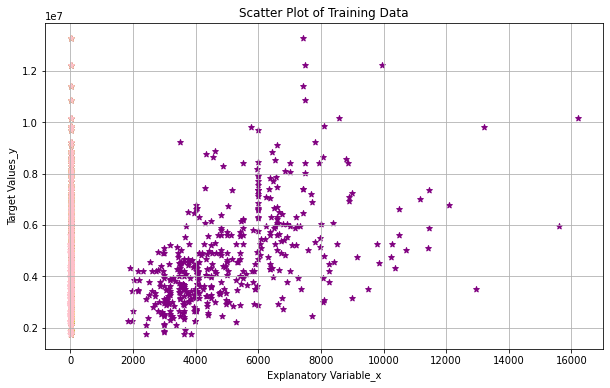

In [62]:
plt.scatter(x1, y, color = 'purple', marker = '*')
plt.scatter(x2, y, color = 'red', marker = '*')
plt.scatter(x3, y, color = 'blue', marker = '*')
plt.scatter(x4, y, color = 'yellow', marker = '*')
plt.scatter(x5, y, color = 'pink', marker = '*')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Explanatory Variable_x')
plt.ylabel('Target Values_y')
plt.title('Scatter Plot of Training Data')

In [63]:
x0 = np.ones((m, 1))
x1 = x1.reshape(m, 1)
x2 = x2.reshape(m, 1)
x3 = x3.reshape(m, 1)
x4 = x4.reshape(m, 1)
x5 = x5.reshape(m, 1)
x6 = x6.reshape(m, 1)
x7 = x7.reshape(m, 1)
x8 = x8.reshape(m, 1)
x9 = x9.reshape(m, 1)
x10 = x10.reshape(m, 1)
x1[: 5], x2[: 5], x3[: 5], x4[: 5], x5[: 5], x6[: 5], x7[: 5], x8[: 5], x9[: 5], x10[: 5]

(array([[3620],
        [4000],
        [3040],
        [3600],
        [9860]], dtype=int64),
 array([[2],
        [2],
        [2],
        [2],
        [3]], dtype=int64),
 array([[1],
        [1],
        [1],
        [1],
        [1]], dtype=int64),
 array([[1],
        [1],
        [1],
        [1],
        [1]], dtype=int64),
 array([[1],
        [1],
        [0],
        [1],
        [1]], dtype=int64),
 array([[0],
        [0],
        [0],
        [0],
        [0]], dtype=int64),
 array([[0],
        [0],
        [0],
        [0],
        [0]], dtype=int64),
 array([[0],
        [0],
        [0],
        [0],
        [0]], dtype=int64),
 array([[0],
        [0],
        [0],
        [0],
        [0]], dtype=int64),
 array([[0],
        [0],
        [0],
        [0],
        [0]], dtype=int64))

In [64]:
X = np.hstack((x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10))
X[: 5]

array([[1.00e+00, 3.62e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 4.00e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 3.04e+03, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 3.60e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 9.86e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00]])

In [65]:
x_0 = np.ones((n, 1))
x_1 = x_1.reshape(n, 1)
x_2 = x_2.reshape(n, 1)
x_3 = x_3.reshape(n, 1)
x_4 = x_4.reshape(n, 1)
x_5 = x_5.reshape(n, 1)
x_6 = x_6.reshape(n, 1)
x_7 = x_7.reshape(n, 1)
x_8 = x_8.reshape(n, 1)
x_9 = x_9.reshape(n, 1)
x_10 = x_10.reshape(n, 1)
x_0[: 5], x_1[: 5], x_2[: 5], x_3[: 5], x_4[: 5], x_5[: 5], x_6[: 5], x_7[: 5], x_8[: 5], x_9[: 5], x_10[: 5]

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 array([[ 4000],
        [ 9620],
        [ 3460],
        [13200],
        [ 3660]], dtype=int64),
 array([[3],
        [3],
        [4],
        [2],
        [4]], dtype=int64),
 array([[1],
        [1],
        [1],
        [1],
        [1]], dtype=int64),
 array([[2],
        [1],
        [2],
        [1],
        [2]], dtype=int64),
 array([[1],
        [1],
        [1],
        [1],
        [0]], dtype=int64),
 array([[0],
        [0],
        [0],
        [0],
        [0]], dtype=int64),
 array([[0],
        [1],
        [0],
        [1],
        [0]], dtype=int64),
 array([[0],
        [0],
        [0],
        [1],
        [0]], dtype=int64),
 array([[0],
        [0],
        [1],
        [0],
        [0]], dtype=int64),
 array([[1],
        [2],
        [0],
        [1],
        [0]], dtype=int64))

In [66]:
X_test = np.hstack((x_0, x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8, x_9, x_10))
X_test[: 5]

array([[1.00e+00, 4.00e+03, 3.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00],
       [1.00e+00, 9.62e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 2.00e+00],
       [1.00e+00, 3.46e+03, 4.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 1.32e+04, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00, 1.00e+00],
       [1.00e+00, 3.66e+03, 4.00e+00, 1.00e+00, 2.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00]])

In [67]:
theta = np.zeros((11, 1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [68]:
def compute_loss(X, y, theta):
   
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)


    return J

In [69]:
loss = compute_loss(X, y, theta)
print('The loss for all thetas =', loss)

The loss for all thetas = 5770455632864301.0


In [70]:
def gradient_descent(X, y, theta, alpha, iterations, X_test, y_test): 
     
    loss_history = np.zeros(iterations)
    validation_loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        loss_history[i] = compute_loss(X, y, theta)
        validation_loss_history[i] = compute_loss(X_test, y_test, theta)
        
        
    return theta, loss_history, validation_loss_history   

In [71]:
theta = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
iterations = 5000;
alpha = 0.00000000001;

In [72]:
theta, loss_history, validation_loss_history = gradient_descent (X, y, theta, alpha, iterations, X_test, y_test)
print('Final value of theta =', theta)
print('loss_history =', loss_history)
print('validation_loss_history =', validation_loss_history)

Final value of theta = [1.29598753e-01 6.79284159e+02 4.05601841e-01 1.85508832e-01
 2.65815286e-01 1.17113427e-01 3.05823418e-02 5.13727980e-02
 7.59805271e-03 5.67409819e-02 1.10775937e-01]
loss_history = [1.32278181e+13 1.32206506e+13 1.32134876e+13 ... 2.21901700e+12
 2.21869704e+12 2.21837728e+12]
validation_loss_history = [3.14688245e+12 3.14511054e+12 3.14333976e+12 ... 4.81007088e+11
 4.80937268e+11 4.80867496e+11]


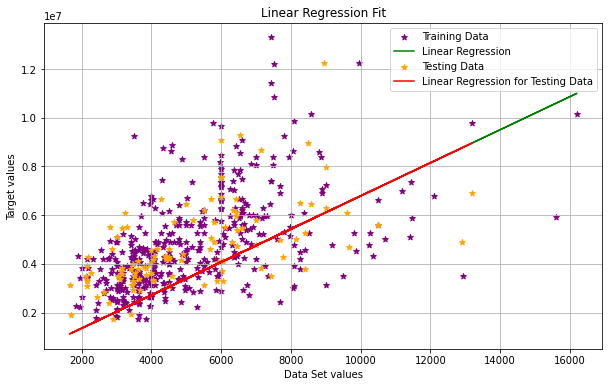

In [73]:
plt.scatter(X[:, 1], y, color = 'purple', marker = '*', label = 'Training Data')
plt.plot(X[:, 1], X.dot(theta), color = 'green', label = 'Linear Regression')
plt.scatter(X_test[:, 1], y_test, color = 'orange', marker = '*', label = 'Testing Data')
plt.plot(X_test[:, 1], X_test.dot(theta), color = 'red', label = 'Linear Regression for Testing Data')

plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('Data Set values')
plt.ylabel('Target values')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

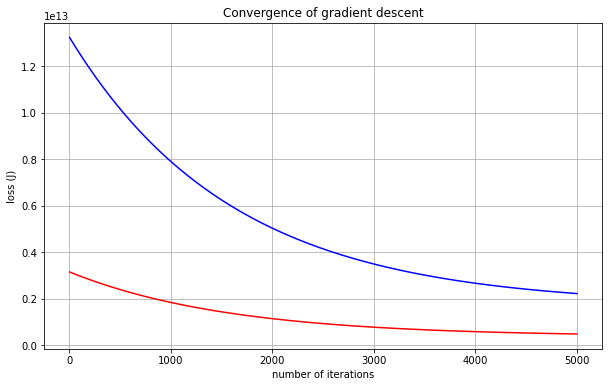

In [74]:
plt.plot(range(1, iterations + 1), loss_history, color = 'blue')
plt.plot(range(1, iterations + 1), validation_loss_history, color = 'red')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid()
plt.xlabel('number of iterations')
plt.ylabel('loss (J)')
plt.title('Convergence of gradient descent')